In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trainer

In [1]:
TRAINER_RESULTS = {
    "minatar_dqn": "minatar_dqn/trainer_shapley_final.csv",
    "sipd_ppo": "sipd_ppo/trainer_shapley_final.csv",
    "sipd_ordered_ppo": "sipd_ordered_ppo/trainer_nowak_radzik_final.csv"
}

In [3]:
def display_shapley(file: str, title: str):
    df = pd.read_csv(
        file,
        index_col=0
    )
    # only against pure eval strategies
    pure_df = df[df.index]
    plt.figure()
    hm = sns.heatmap(
        pure_df, 
        cmap='viridis', 
        linewidths=0.1, 
        annot=True, 
        fmt='.2f'
    )
    hm.set(xlabel="$EVAL$", ylabel="$SHAPLEY$", title=title.upper())

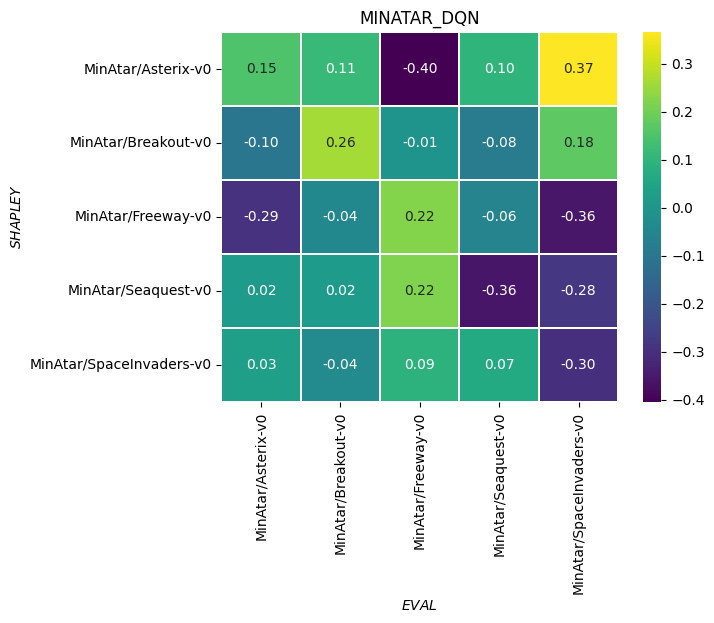

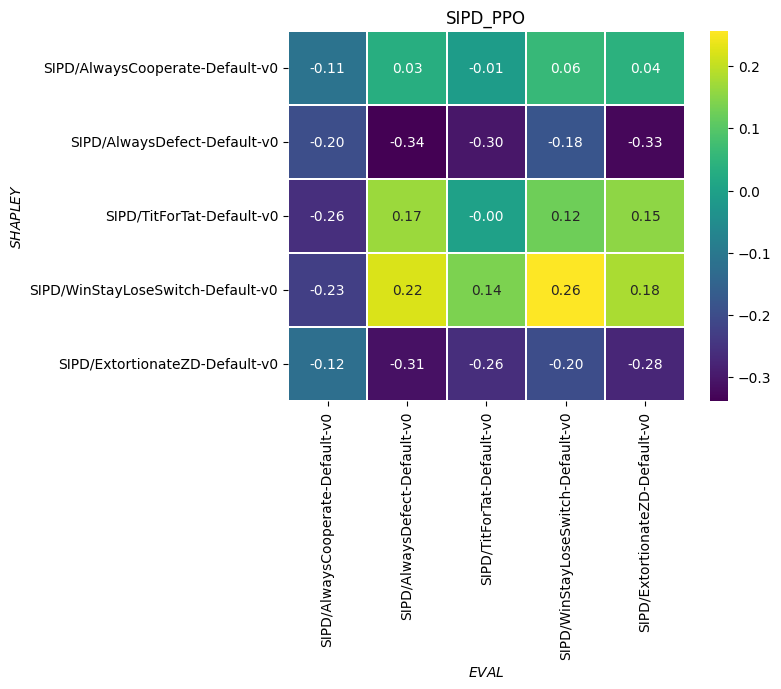

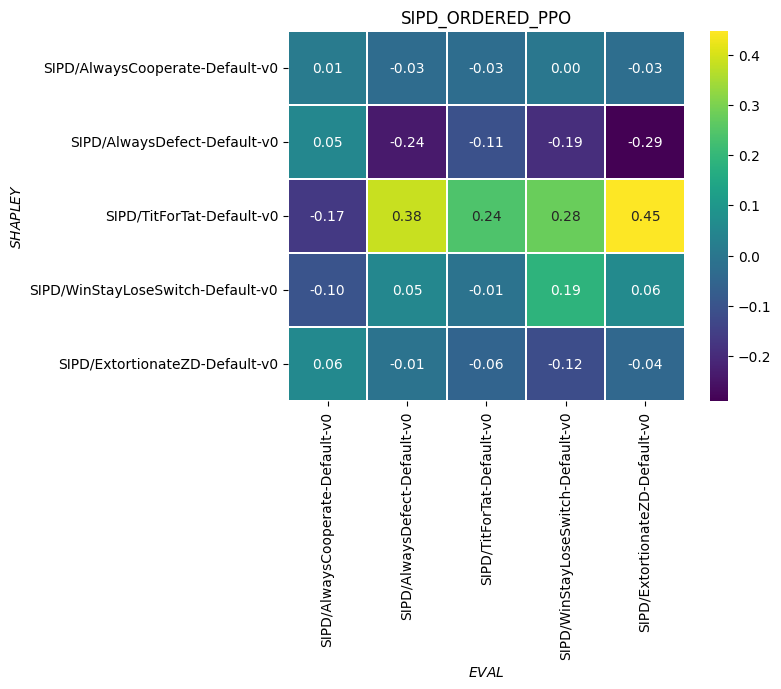

In [5]:
for result in TRAINER_RESULTS:
    display_shapley(TRAINER_RESULTS[result], result)

In [32]:

pure_df.head()

,MinAtar/Asterix-v0,MinAtar/Breakout-v0,MinAtar/Freeway-v0,MinAtar/Seaquest-v0,MinAtar/SpaceInvaders-v0
MinAtar/Asterix-v0,0.151804,0.114687,-0.403512,0.096212,0.366467
MinAtar/Breakout-v0,-0.102491,0.263196,-0.005028,-0.084091,0.175330
MinAtar/Freeway-v0,-0.292955,-0.044828,0.222521,-0.055303,-0.355552
MinAtar/Seaquest-v0,0.015206,0.015184,0.216460,-0.359091,-0.281152
MinAtar/SpaceInvaders-v0,0.028093,-0.037210,0.091529,0.065152,-0.296579


<Axes: >

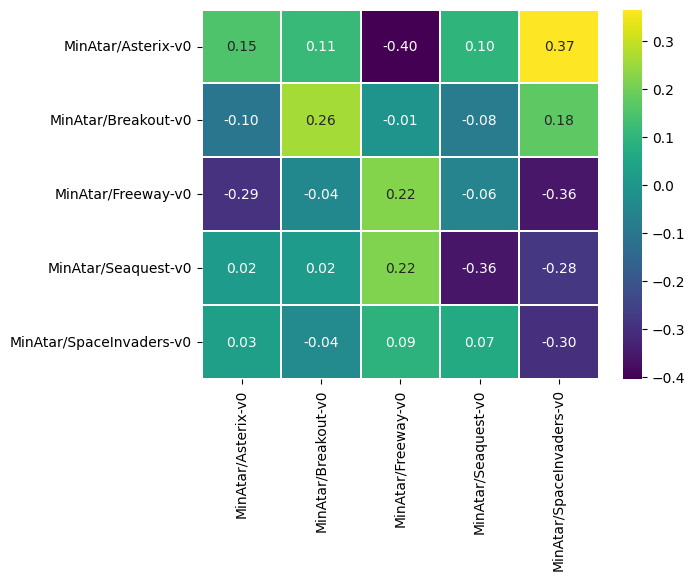

In [10]:
import numpy as np
x = np.ones(3) / 3
print(x)
x = x * 100000
print(x)
print(np.ceil(x.cumsum()))

[0.33333333 0.33333333 0.33333333]
[33333.33333333 33333.33333333 33333.33333333]
[ 33334.  66667. 100000.]
